# Spotify Genre Classifier

## Set Up

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
sp_data = pd.read_csv("test.csv")

In [4]:
# Histogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-white')
sp_data.head()

,Song_Name,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Temp,Target
0,Under The Sun (with J. Cole & Lute feat. DaBaby),Dreamville,0.691,0.640,0,-6.441,0.369,0.5110,0.0,0.4090,0.163,138.672,1
1,"Down Bad (feat. JID, Bas, J. Cole, EARTHGANG &...",Dreamville,0.761,0.586,0,-5.368,0.359,0.0392,0.0,0.0558,0.719,149.804,1
2,LamboTruck (with Cozz feat. REASON & Childish ...,Dreamville,0.678,0.695,10,-5.323,0.286,0.0485,0.0,0.2540,0.242,135.044,1
3,Swivel (with EARTHGANG) - From The Upcoming Al...,Dreamville,0.507,0.545,2,-7.209,0.430,0.2500,0.0,0.2390,0.392,78.461,1
4,Oh Wow...Swerve (with J. Cole feat. Zoink Gang...,Dreamville,0.509,0.703,1,-6.097,0.512,0.3900,0.0,0.2690,0.301,174.259,1


## Data Visualization

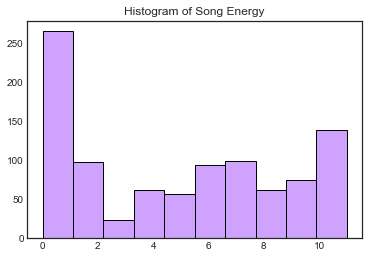

In [5]:
x = sp_data["Key"]
fig, ax = plt.subplots()
ax.hist(x, color = 'xkcd:lilac', edgecolor='black')
ax.set(title="Histogram of Song Energy")
plt.show()

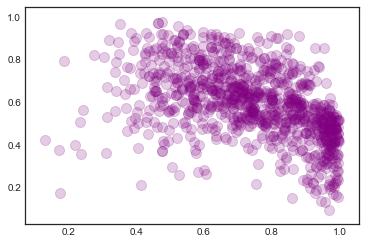

In [6]:
plt.scatter( sp_data["Energy"], sp_data["Danceability"], marker='o', color = 'purple', s = 100, alpha=.2)
plt.show()

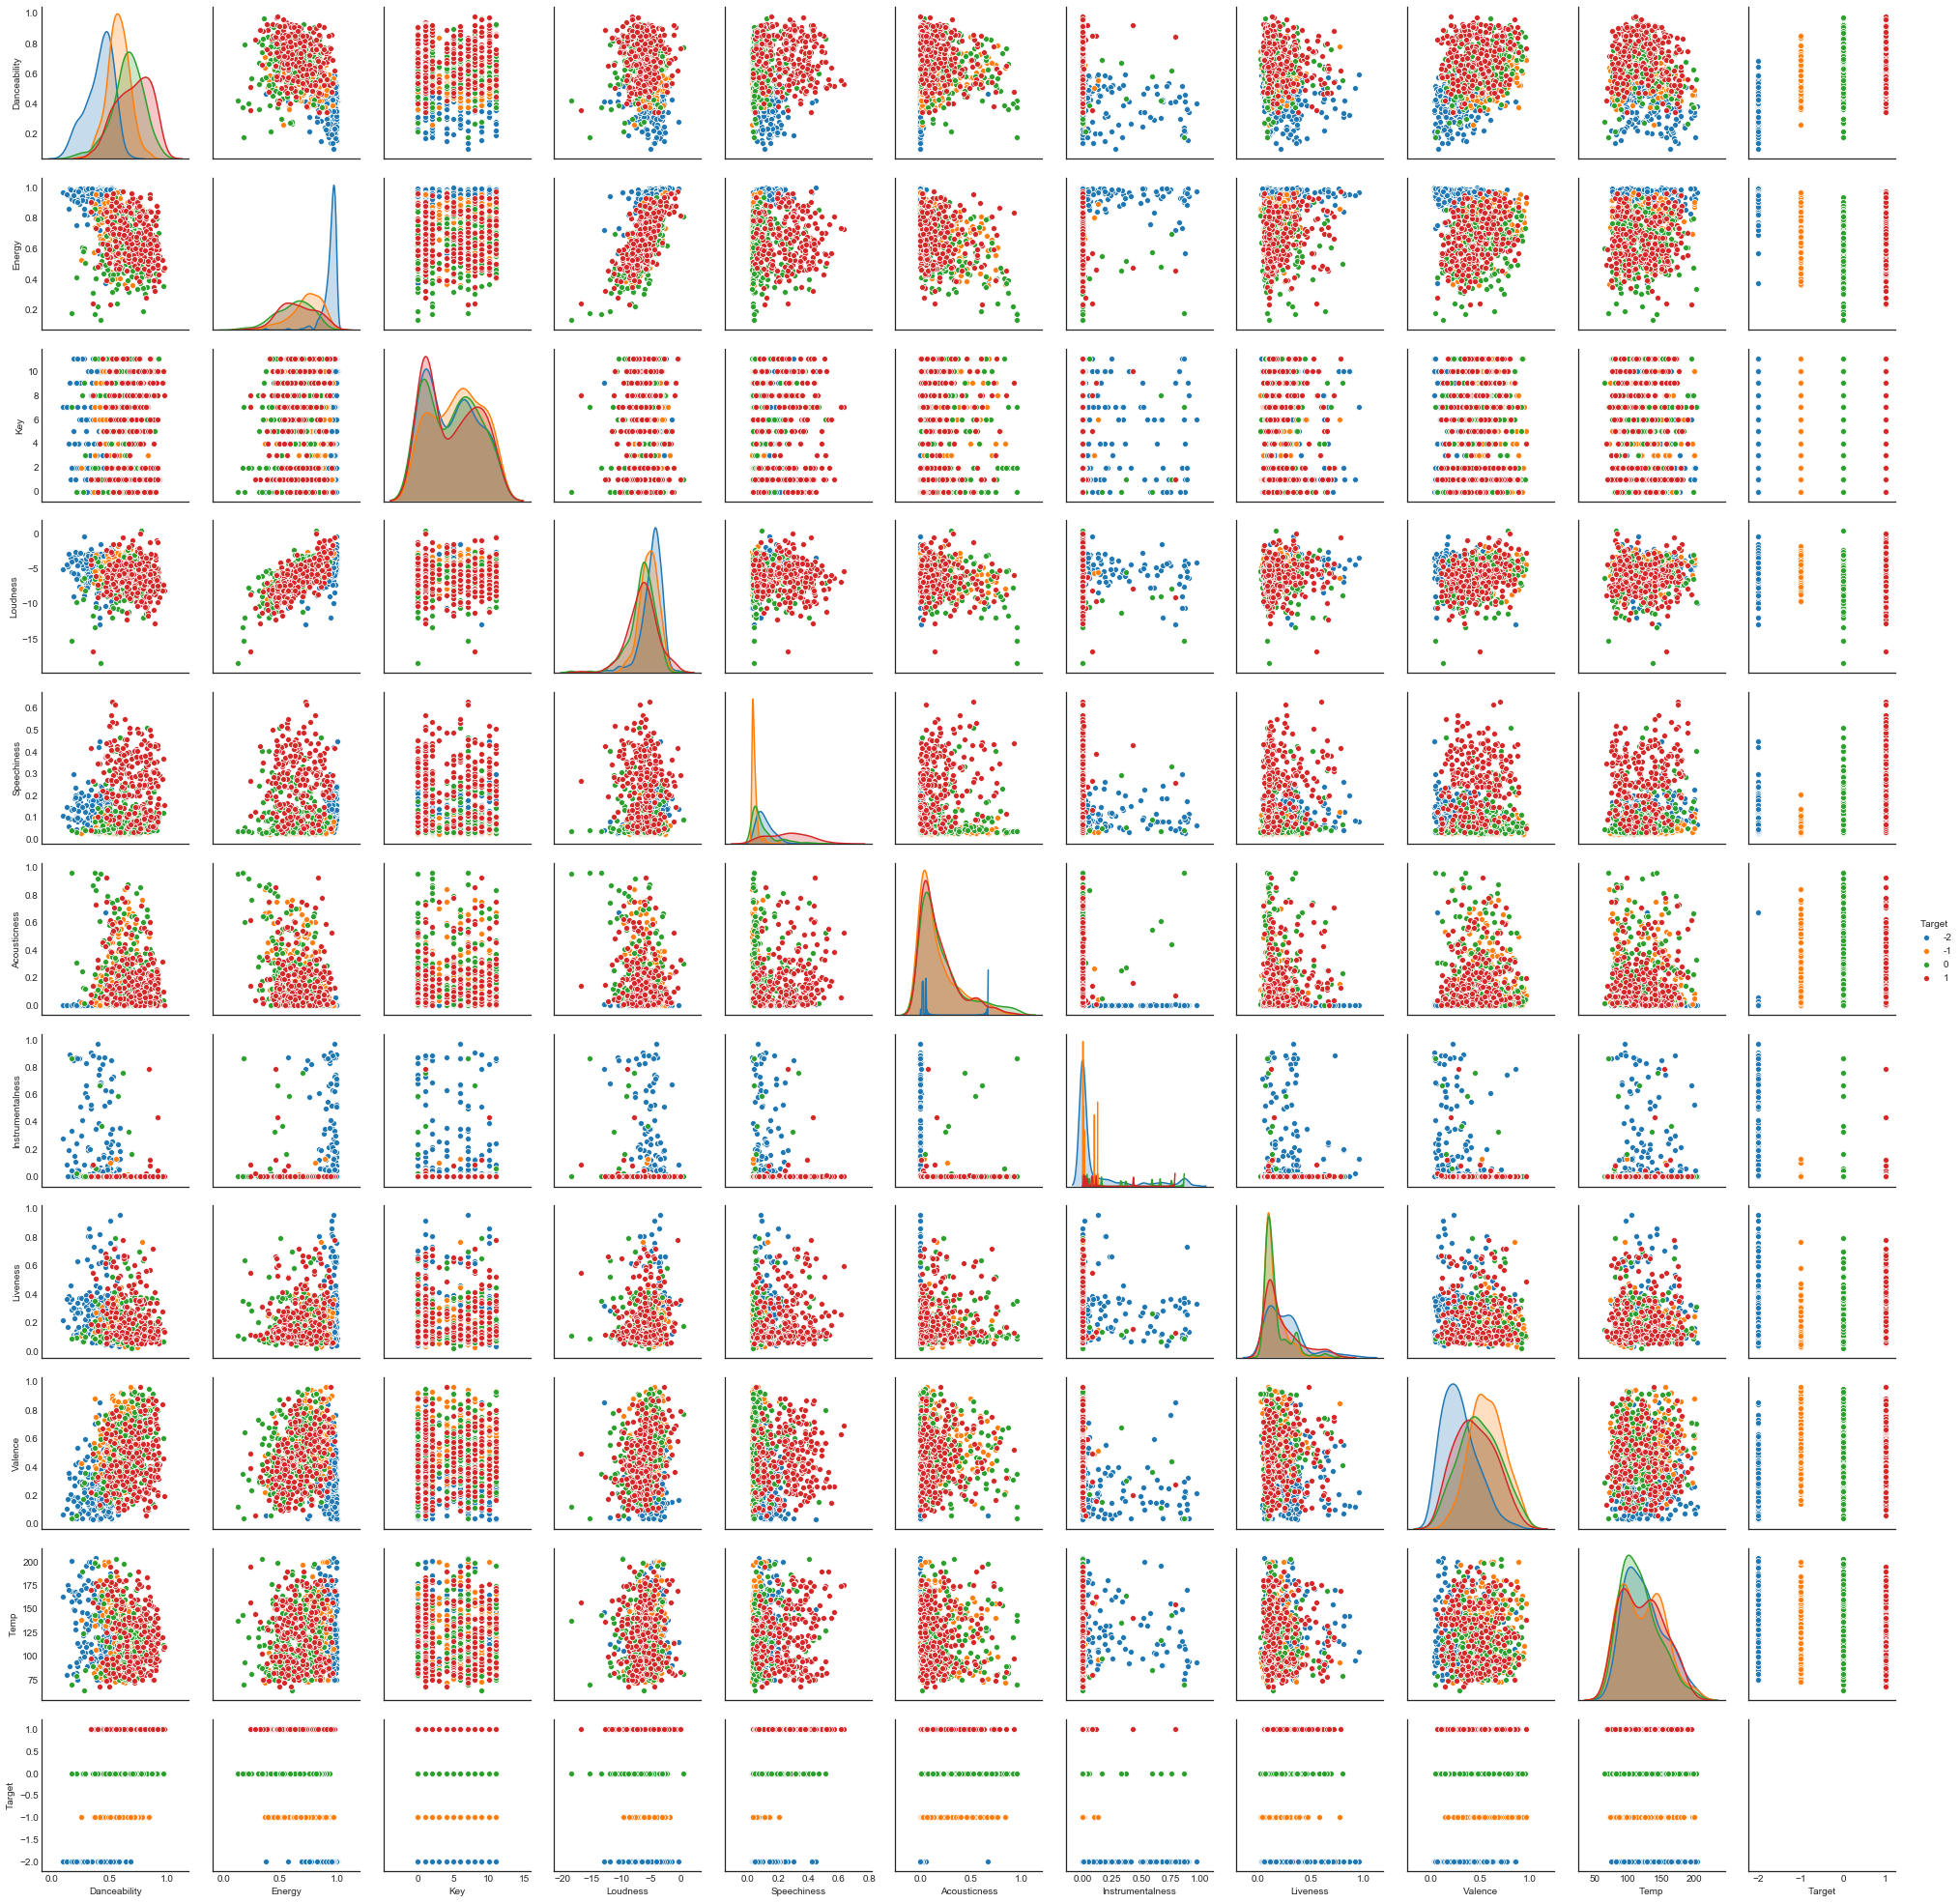

In [8]:
import seaborn as sns
features = ["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]
pair_plot = sns.pairplot(sp_data, hue='Target')

## Most Important Features

In [7]:
#Machine Learning
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [8]:
#Splitting
from sklearn.model_selection import train_test_split
#Standardize
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]

X = sp_data[["Danceability","Energy","Key","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]].values
y = sp_data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

rf = RandomForestClassifier(n_estimators=10000, random_state=0)
rf.fit(X_train_std, y_train)

feature_importances = rf.feature_importances_

print("Feature importances:\n{}".format(feature_importances))

most_important_features = pd.DataFrame(feature_importances.reshape(1,-1), columns=["Danceability","Energy","Key","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"], index = ["Importance"])
most_important_features


Feature importances:
[0.12393555 0.15586328 0.02778214 0.0561242  0.23489461 0.19148617
 0.04145844 0.04942689 0.07478224 0.04424648]


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Temp
Importance,0.123936,0.155863,0.027782,0.056124,0.234895,0.191486,0.041458,0.049427,0.074782,0.044246


## Machine Learning Models

In [12]:
#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Temp"]

#["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]

X = sp_data[["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]].values
y = sp_data['Target'].values

In [13]:
#Splitting
#Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [16]:
#Logistic Regression
#binary classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7538461538461538

In [15]:
#Support Vector Machine - Linear
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7794871794871795

In [17]:
#Support Vector Machine - RBF
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.676923076923077

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7282051282051282

In [19]:
#Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7794871794871795

In [20]:
#K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6205128205128205

In [21]:
#Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(500)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

0.7948717948717948

### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nn, X_train_std, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [23]:
display_scores(scores)

Scores: [0.8625     0.81012658 0.73417722 0.74358974 0.67948718 0.84615385
 0.76923077 0.79220779 0.81578947 0.75      ]
Mean: 0.7803262601821895
Standard deviation: 0.05297478860671804


In [24]:
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))
    
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.8125,0.835443,0.746835,0.717949,0.641026,0.794872,0.730769,0.727273,0.763158,0.750000,0.751982
KNN,0.7750,0.721519,0.670886,0.641026,0.653846,0.717949,0.692308,0.675325,0.697368,0.697368,0.694259
SVM,0.8000,0.835443,0.759494,0.756410,0.679487,0.833333,0.769231,0.740260,0.828947,0.776316,0.777892
Forest,0.8000,0.759494,0.708861,0.730769,0.679487,0.820513,0.743590,0.740260,0.802632,0.750000,0.753560
NN,0.8500,0.797468,0.734177,0.730769,0.679487,0.846154,0.756410,0.792208,0.789474,0.750000,0.772615


### Hyper-parameter Tuning

In [53]:
#Finding the best hyperparameters for all the classifiers

#Splitting
#Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X = sp_data[["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]].values
y = sp_data['Target'].values

#----------------------------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#----------------------------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

print("Logistic Regression \n")

param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

log_reg_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

print("Support Vector Machine\n")

gs = GridSearchCV(estimator=svm, param_grid=[{'kernel': ['rbf', 'linear']}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

svm_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

print("Decision Tree\n")

gs = GridSearchCV(estimator=tree, param_grid=[{'max_depth': [3, 5, 7]}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

tree_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

print("Forest\n")

gs = GridSearchCV(estimator=forest, param_grid=[{'n_estimators': [10, 100, 1000]}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

forest_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

print("K Nearest Neighbors\n")

gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], 'n_neighbors': [3, 5, 7]}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

knn_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

print("Neural Network\n")

gs = GridSearchCV(estimator=nn, param_grid=[{'hidden_layer_sizes': [100, 250, 500, 1000], 'activation': ['relu', 'tanh', 'logistic']}], scoring='accuracy', cv=10)

gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}\n".format(train_score, test_score))

print(gs.best_params_)
print()

nn_bp = gs.best_params_

#----------------------------------------------------------------------------------------------------

Logistic Regression 

Train score: 0.7562408223201175 
Test score: 0.8054607508532423

{'C': 100.0}

Support Vector Machine

Train score: 0.8208516886930984 
Test score: 0.78839590443686

{'kernel': 'rbf'}

Decision Tree

Train score: 0.8722466960352423 
Test score: 0.7372013651877133

{'max_depth': 7}

Forest

Train score: 0.9926578560939795 
Test score: 0.8054607508532423

{'n_estimators': 100}

K Nearest Neighbors

Train score: 0.9926578560939795 
Test score: 0.7440273037542662

{'n_neighbors': 5, 'weights': 'distance'}

Neural Network



C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train score: 0.801762114537445 
Test score: 0.8122866894197952

{'activation': 'tanh', 'hidden_layer_sizes': 250}



C:\Users\avina\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
# Cross Validation of all the best paramters and table to showcase all the numbers

from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(C=log_reg_bp["C"])
svm = SVC(kernel=svm_bp["kernel"])
tree = DecisionTreeClassifier(max_depth=tree_bp["max_depth"])
forest = RandomForestClassifier(n_estimators=forest_bp["n_estimators"], random_state=0)
knn = KNeighborsClassifier(n_neighbors=knn_bp["n_neighbors"], weights=knn_bp["weights"])
nn = MLPClassifier(activation=nn_bp["activation"], hidden_layer_sizes=nn_bp["hidden_layer_sizes"])

classifiers = [log_reg, knn, tree, svm, forest, nn]
index = ["LR", "KNN", "Tree", "SVM", "Forest", "NN"]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

models_df = pd.DataFrame(model_scores, columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         index=index)

models_df["Mean"] = models_df.mean(axis=1)

models_df

NameError: name 'log_reg_bp' is not defined

### Boxplot

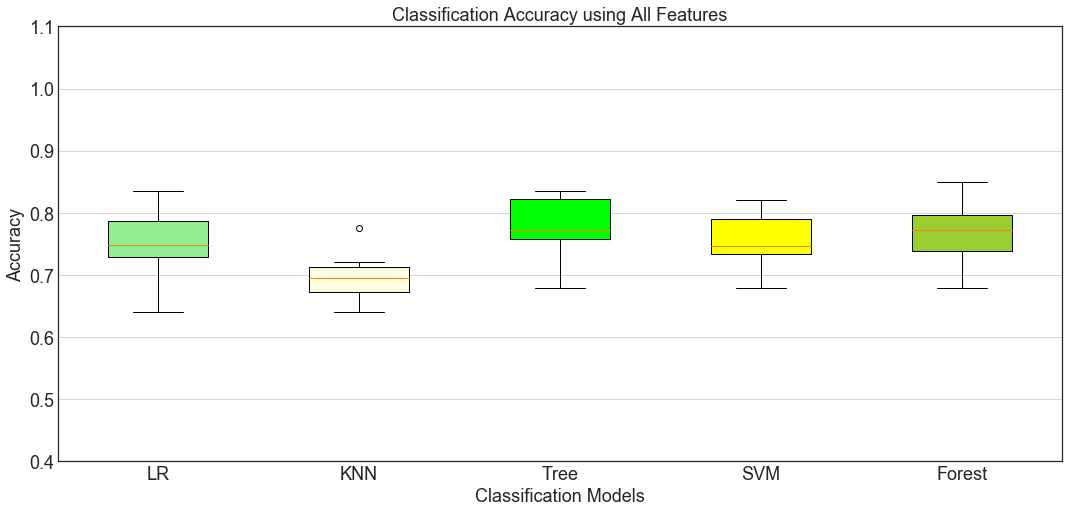

In [27]:
# Boxplot

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'Tree', 'SVM', 'Forest', 'NN'])

y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

## Testing on Top 50 US Data

In [56]:
tp_data = pd.read_csv("top50.csv")
TX = tp_data[["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence"]].values

In [61]:
TestData = svm.predict(TX)
TestData

array([ 0,  0, -1,  1, -1, -1,  0,  0,  1,  1, -1,  1,  0,  0,  0, -2, -1,
        1,  0, -1,  0,  1,  0, -1,  1,  0,  0,  1,  0,  0,  1, -1, -1, -1,
        0,  0,  1, -1,  0, -1, -1,  0,  0,  1, -1,  0, -1,  1,  1,  0],
      dtype=int64)

In [59]:
TestData = nn.predict(TX)
TestData

array([ 0, -1,  0,  1,  0,  1,  0, -1,  0,  1,  0,  1,  1,  0,  0,  0, -1,
        1,  0, -1,  0,  0,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0, -1, -1,
        0,  0,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  1,  1,  0],
      dtype=int64)

In [46]:
tp_data["Song_Name"] + "       " + tp_data["Artist"]

0                           Señorita       Shawn Mendes
1                         The Archer       Taylor Swift
2         Goodbyes (Feat. Young Thug)       Post Malone
3                                Ransom       Lil Tecca
4                               Truth Hurts       Lizzo
5     Money In The Grave (Drake ft. Rick Ross)      ...
6                                Panini       Lil Nas X
7     Sunflower - Spider-Man: Into the Spider-Verse ...
8      Beautiful People (feat. Khalid)       Ed Sheeran
9                                     Suge       DaBaby
10                    How Do You Sleep?       Sam Smith
11    The London (feat. J. Cole & Travis Scott)     ...
12                          bad guy       Billie Eilish
13                                     Lalala       Y2K
14             You Need To Calm Down       Taylor Swift
15    One Thing Right - feat. Kane Brown       Marsh...
16      Antisocial (with Travis Scott)       Ed Sheeran
17                Pop Out (feat. Lil Tjay)      